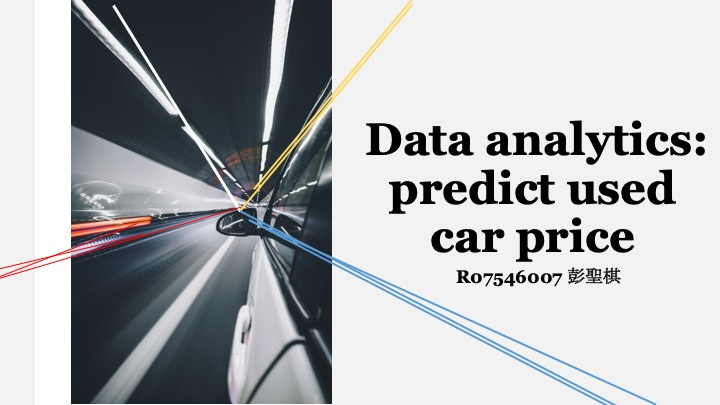

<font face="黑体">Introduction

For long time, the price of used car isn’t clear.  Through collecting used car data, including brand, version, gear type, old and how much km so far, we might predict price  
In this project, Using the Spanish used car data from Kaggle,  I would like to use neural network to predict the price according to the car information.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.datasets import mnist
from keras.utils import np_utils

df = pd.read_excel('raw_used_car_data.xlsx')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<br>
<font face="黑体">
Raw data: include brand, model, old , power, sale type, num ofowners, gear of type, kms

In [2]:
df.head()

,ID,make,model,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999.0
1,27821,Ford,Mustang,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000.0
2,97801,Porsche,911,358.0,220.0,used,NaN,manual,gasoline,56300.0,555555.0
3,98251,Porsche,911,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000.0
4,98250,Porsche,911,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000.0


<font face="黑体"> Data pre-processing <br>

1/elimate NA variable <br>
<br>
2/transfer the text into number<br>
   -make:{1,2...36}<br>
   -gear type:{1,2,3}<br>
   -fuel type:{1,2,...7}<br>
<br>
3/lable the y data:<br>
   -cut price by 10 interval)<br>
   -unit: 10000 dollars<br>
   -example: if price is 1000, label [1,0,0,0,0,0,0,0,0,0] 

In [3]:
##transfer the text into number(table)
df_tn = pd.read_excel('datapre.xlsx')
df_tn.head()

,make,gear,fuel
1,Alfa,auto,CNG
2,Audi,manual,diesel
3,Bently,semi,electric
4,Bmw,NaN,etanol
5,chevrolet,NaN,gasoline


<br>
<font face="黑体"> x data

In [8]:
# nurmeric
df_t = pd.read_excel('training_xx.xlsx')

In [9]:
df_t.head()

,ID,make,months_old,power,gear_type,fuel_type,kms,price
0,25,2,89,77,2,2,102844,11245
1,26,2,90,77,2,2,232000,7500
2,27,2,91,77,2,2,99000,9950
3,29,2,87,77,2,2,120000,9000
4,30,2,89,90,2,5,83000,9200


In [10]:
##x data
x_train= np.array([df_t['make'] , df_t['months_old'] , df_t['power']  ,  df_t['gear_type'] , 
            df_t['fuel_type'] , df_t['kms']]) 
x_train=x_train.T
print (x_train)

[[     2     89     77      2      2 102844]
 [     2     90     77      2      2 232000]
 [     2     91     77      2      2  99000]
 ...
 [    36      7    173      1      2   6900]
 [    36     15    235      1      6  15000]
 [    36     20    235      1      6  16000]]


In [11]:
## the number of x data
len(x_train)

88739

<br>
<font face="黑体"> y data

In [12]:
## put y in [1*20]
df_tt = pd.read_excel('training_yy.xlsx')

In [13]:
df_tt.head()

,1,2,3,4,5,6,7,8,9,10
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [14]:
##y data
y_train= np.array([df_tt[1] , df_tt[2] , df_tt[3] , df_tt[4] , df_tt[5] , df_tt[6] , df_tt[7] , df_tt[8] , df_tt[9]  , df_tt[10] ])
y_train=y_train.T
print (y_train)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [15]:
## the number of y data
len(y_train)

88739

<br>
<font face="黑体"> Actual y data

In [16]:
## actual y
y_actual_train= np.array([df_t['price'] ]) 
y_actual_train=y_actual_train.T
print (y_actual_train)

[[11245]
 [ 7500]
 [ 9950]
 ...
 [69900]
 [73189]
 [79900]]


<br>
<font face="黑体"> Test data:x/y

In [17]:
##test data
X = x_train[87]

In [18]:
X

array([    2,    82,    90,     1,     5, 67000])

In [19]:
Y = y_actual_train[87]

In [20]:
Y

array([14500])

<br>
<font face="黑体"> Reshape data

In [23]:
x_train = x_train.reshape(88739, 6)

In [24]:
y_train = y_train.reshape(88739, 10)

<br>
<font face="黑体"> Normalize data

In [25]:
##normalize
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

(0.0, 1.0)

<br>
<font face="黑体"> Build functin API

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD , RMSprop , Adagrad
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [79]:
f_1 = Dense(20, activation='sigmoid')
f_2 = Dense(15, activation='relu')
f_3 = Dense(20, activation='sigmoid')
f_4 = Dense(15, activation='tanh')
f_5 = Dense(10, activation='relu')
f_6 = Dense(5, activation='sigmoid')
f_7 = Dense(15, activation='relu')
f_8 = Dense(10, activation='relu')
f_9 = Dense(10, activation='softmax')

x = Input(shape=(6,))

h_1 = f_1(x)
h_2 = f_2(x)
c1 = concatenate([h_1, h_2])
h_3 = f_3(c1)
h_4 = f_4(h_3)
h_5 = f_5(h_3)
h_6 = f_6(h_3)
c2 = concatenate([h_4, h_5, h_6])
h_7=f_7(c2)
h_8=f_8(h_7)
y = f_9(h_8)

In [80]:
model = Model(x, y)

In [81]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 6)            0                                            
__________________________________________________________________________________________________
dense_91 (Dense)                (None, 20)           140         input_11[0][0]                   
__________________________________________________________________________________________________
dense_92 (Dense)                (None, 15)           105         input_11[0][0]                   
__________________________________________________________________________________________________
concatenate_21 (Concatenate)    (None, 35)           0           dense_91[0][0]                   
                                                                 dense_92[0][0]                   
__________

<br>
<font face="黑体"> Training 80%/Test20%

In [85]:
model.compile(loss='categorical_crossentropy', optimizer=Adagrad(lr=0.1), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=30 , verbose=1, validation_split=0.2)

Train on 70991 samples, validate on 17748 samples
Epoch 1/30
70991/70991 [==============================] - 2s 21us/step - loss: 1.3363 - acc: 0.4854 - val_loss: 1.3149 - val_acc: 0.5590
Epoch 2/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1966 - acc: 0.5186 - val_loss: 1.3460 - val_acc: 0.5349
Epoch 3/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1916 - acc: 0.5199 - val_loss: 1.2625 - val_acc: 0.5815
Epoch 4/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1886 - acc: 0.5197 - val_loss: 1.2420 - val_acc: 0.5831
Epoch 5/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1854 - acc: 0.5204 - val_loss: 1.2571 - val_acc: 0.5771
Epoch 6/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1872 - acc: 0.5204 - val_loss: 1.2775 - val_acc: 0.5690
Epoch 7/30
70991/70991 [==============================] - 0s 5us/step - loss: 1.1812 - acc: 0.5209 - val_loss: 1.2324 - val_acc: 0.60

<br>
<font face="黑体"> Conclusion
    
1/ the accuracy of training machine~55%<br>
2/the accuracy of test~57%<br>

<br>
<font face="黑体"> Note:
    
1/ Version of 20 interval (unit: 5000dollars/ num of data:20000)<br>
https://nbviewer.jupyter.org/github/austinpengpublic/the-code-of-python/blob/master/project_cut20part.ipynb<br>
2/ Version of 10 interval (unit: 10000dollars/ num of data:20000)<br>
https://nbviewer.jupyter.org/github/austinpengpublic/the-code-of-python/blob/master/project_cut10part.ipynb<br>